## Analysis of Lipids data
There are three cohorts of data across 10 years (i.e., baseline, f2, f3).  
The purpose of this experiment is to predict whether the patient will gain any type of anormality in lipid related indictors (i.e., tc_cl, tg_cl, hdl_cl, ldl_cl, dys_cl).  
NB.:   
1. once dyslipi med has been applied in any timestamp, the person is considered as with dys_cl is 1 from the timestamp onwards.
2. data cleanning strategies: 
    1. impute med related column with 0, if the corresponding clinical diagnosis is 0
    2. remove rows if any of baseline SBP/DBP/GLU/TG/HDL/LDL/TC/BMI/age/wc is missing
    3. any number larger than or equal to 999 will be replaced with NA
    

In [1]:
import os
import sys
sys.path.append(r"C:\\Users\\bo\\Documents\\GitHub\\metabolic_syndrome\\")
os.chdir("..")

In [2]:
import pandas as pd
import numpy as np
import random
from scipy.stats import ttest_ind
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from models.feature_selection import distribution_deviation
import matplotlib.pylab as plt
import seaborn as sns

pd.set_option("max_column", None)
seed =0 
random.seed(seed)
np.random.seed(seed)

In [3]:
root = Path(r"C:\Users\bo\Documents\GitHub\metabolic_syndrome").resolve()
raw_data = Path(r"C:\Users\bo\Documents\GitHub\metabolic_syndrome\data\raw_data").resolve()
transformed_data = Path(r"C:\Users\bo\Documents\GitHub\metabolic_syndrome\data\transformed_data").resolve()

clinic_data = raw_data / "20220106_GNHS1-4_patient_inf_include_TC.csv"
prot_data = raw_data / "20210908_GNHS1-4_baseline_sample_all_prot.csv"

In [53]:
df_clinic = pd.read_csv(clinic_data, index_col="X")
df_clinic[df_clinic >= 999] = np.NaN
df_clinic

SBP         DBP  sex     wc  DM_med    Glu     TG    HDL    LDL  \
X                                                                            
NL0001  120.00   70.000000    0  85.00     NaN  2.300  1.760  1.220  1.570   
NL0002  125.00   80.000000    0  87.00     NaN  5.000  1.060  1.160  3.870   
NL0003  160.00  100.000000    0  92.00     NaN  3.900  1.500  1.230  4.190   
NL0004  170.00   85.000000    0  69.00     NaN  5.000  1.020  1.910  2.290   
NL0005  145.00   90.000000    1  86.00     NaN  5.300  1.220  1.550  4.120   
...        ...         ...  ...    ...     ...    ...    ...    ...    ...   
NL4873  147.33   97.330002    1  97.90     NaN  6.614  1.130  1.461  4.350   
NL4874  135.00   82.000000    1  85.75     NaN  5.395  1.111  1.302  4.195   
NL4875  111.00   65.330002    0  85.10     NaN  6.412  1.433  1.609  3.800   
NL4876  180.00   96.330002    1  91.65     NaN  8.609  1.245  1.201  4.635   
NL4877  113.33   77.000000    0  91.00     NaN  5.569  1.495  1.517  3.115   

         wcf2       SBPf2      DBPf2  DM_medf2  LDLf2   TGf2  HDLf2  Gluf2  \
X                                                                            
NL0001  88.20  132.500000  55.500000       NaN  3.680  1.450  1.400  6.300   
NL0002  96.50  103.000000  65.500000       1.0  3.481  2.202  0.953  5.675   
NL0003  93.20  113.000000  69.000000       NaN  2.415  3.975  0.922  4.630   
NL0004  76.70  138.666667  72.333333       NaN  2.751  1.000  2.032  5.569   
NL0005  94.00  178.666667  92.000000       NaN  4.311  1.533  1.495  5.593   
...       ...         ...        ...       ...    ...    ...    ...    ...   
NL4873  98.00  139.333333  85.000000       NaN  3.770  1.440  1.300  6.130   
NL4874  83.70  120.666667  67.666667       NaN  4.690  1.060  1.580  5.030   
NL4875  79.50  130.333333  81.000000       NaN  4.590  1.170  1.760  6.190   
NL4876  78.70  135.666667  80.000000       1.0  3.590  1.120  1.120  6.290   
NL4877  86.45  135.333333  84.666667       NaN  2.940  1.390  1.500  5.260   

        hyper_med  hyper_medf2  dyslipi_med  dyslipi_medf2  hyper_medf3  \
X                                                                         
NL0001        NaN          1.0          NaN            NaN          1.0   
NL0002        NaN          1.0          NaN            1.0          1.0   
NL0003        NaN          1.0          NaN            1.0          1.0   
NL0004        NaN          NaN          NaN            NaN          NaN   
NL0005        NaN          NaN          NaN            NaN          1.0   
...           ...          ...          ...            ...          ...   
NL4873        NaN          NaN          NaN            NaN          NaN   
NL4874        NaN          NaN          NaN            NaN          NaN   
NL4875        NaN          NaN          NaN            NaN          NaN   
NL4876        NaN          1.0          NaN            NaN          NaN   
NL4877        NaN          NaN          NaN            NaN          NaN   

        DM_medf3  LDLf3  TGf3  Gluf3  HDLf3  dyslipi_medf3       wcf3  \
X                                                                       
NL0001       NaN   1.46  1.41   4.50   1.23            NaN  86.800003   
NL0002       1.0   4.01  2.45   6.94   0.92            5.0  93.500000   
NL0003       NaN   2.00  2.15   4.76   1.12            1.0  89.800003   
NL0004       NaN    NaN   NaN    NaN    NaN            NaN        NaN   
NL0005       NaN   2.27  1.05   6.69   1.45            NaN  95.599998   
...          ...    ...   ...    ...    ...            ...        ...   
NL4873       NaN    NaN   NaN    NaN    NaN            NaN        NaN   
NL4874       NaN    NaN   NaN    NaN    NaN            NaN        NaN   
NL4875       NaN    NaN   NaN    NaN    NaN            NaN        NaN   
NL4876       NaN    NaN   NaN    NaN    NaN            NaN        NaN   
NL4877       NaN    NaN   NaN    NaN    NaN            NaN        NaN   

            SBPf3      DBPf3        BMI      BMIf2     

In [5]:
# bullet point 2, replace NaN med to 0 if the patient has negative diagnosis
for med, cl in zip(["DM_med", "dyslipi_med", "hyper_med"], ["dm_cl", "dys_cl", "hyper_cl"]):
    df_clinic.loc[df_clinic[med].isna() & df_clinic[cl] == 0, med] = 0
    df_clinic.loc[df_clinic[med].isin([1, 2, 3, 4]), med] = 1
    df_clinic.loc[df_clinic[med] == 5, med] = 0

In [6]:
df_clinic = df_clinic.loc[~df_clinic["Glu"].isna() &
                          ~df_clinic["TG"].isna() &
                          ~df_clinic["HDL"].isna() &
                          ~df_clinic["LDL"].isna() &
                          ~df_clinic["TC"].isna() &
                          ~df_clinic["wc"].isna() &
                          ~df_clinic["BMI"].isna() &
                          ~df_clinic["age"].isna(),:]
df_clinic
df_clinic = df_clinic.reset_index()
df_clinic.X = df_clinic.X.apply(lambda x: x[:2] + str(int(x[2:])))
df_clinic.set_index("X", inplace=True)
df_clinic

SBP    DBP  sex     wc  DM_med  Glu    TG   HDL   LDL   wcf2  \
X                                                                        
NL1     120.0   70.0    0  85.00     0.0  2.3  1.76  1.22  1.57  88.20   
NL2     125.0   80.0    0  87.00     0.0  5.0  1.06  1.16  3.87  96.50   
NL3     160.0  100.0    0  92.00     0.0  3.9  1.50  1.23  4.19  93.20   
NL4     170.0   85.0    0  69.00     0.0  5.0  1.02  1.91  2.29  76.70   
NL5     145.0   90.0    1  86.00     0.0  5.3  1.22  1.55  4.12  94.00   
...       ...    ...  ...    ...     ...  ...   ...   ...   ...    ...   
NL3228  119.0   79.0    1  87.35     0.0  4.4  1.14  1.15  5.19    NaN   
NL3229  109.0   70.0    0  85.75     0.0  4.7  0.95  1.48  2.83  87.65   
NL3230  138.0   80.0    0  74.50     0.0  3.9  0.42  1.25  3.28  84.50   
NL3231  136.0  103.0    1  95.50     0.0  5.4  1.79  1.32  4.72  95.75   
NL3232  119.0   73.0    1  78.50     0.0  4.2  1.21  1.27  3.94    NaN   

             SBPf2      DBPf2  DM_medf2  LDLf2   TGf2  HDLf2  Gluf2  \
X                                                                     
NL1     132.500000  55.500000       NaN  3.680  1.450  1.400  6.300   
NL2     103.000000  65.500000       1.0  3.481  2.202  0.953  5.675   
NL3     113.000000  69.000000       NaN  2.415  3.975  0.922  4.630   
NL4     138.666667  72.333333       NaN  2.751  1.000  2.032  5.569   
NL5     178.666667  92.000000       NaN  4.311  1.533  1.495  5.593   
...            ...        ...       ...    ...    ...    ...    ...   
NL3228         NaN        NaN       NaN    NaN    NaN    NaN    NaN   
NL3229  117.666667  76.000000       NaN  2.310  1.250  1.720  4.840   
NL3230  141.000000  86.000000       NaN  3.880  0.760  1.480  5.630   
NL3231  132.333333  96.666667       NaN  3.500  2.090  1.240  7.730   
NL3232         NaN        NaN       NaN    NaN    NaN    NaN    NaN   

        hyper_med  hyper_medf2  dyslipi_med  dyslipi_medf2  hyper_medf3  \
X                                                                         
NL1           0.0          1.0          0.0            NaN          1.0   
NL2           0.0          1.0          0.0            1.0          1.0   
NL3           NaN          1.0          NaN            1.0          1.0   
NL4           NaN          NaN          0.0            NaN          NaN   
NL5           NaN          NaN          NaN            NaN          1.0   
...           ...          ...          ...            ...          ...   
NL3228        0.0          NaN          0.0            NaN          NaN   
NL3229        0.0          NaN          0.0            NaN          NaN   
NL3230        0.0          NaN          0.0            NaN          NaN   
NL3231        0.0          2.0          0.0            NaN          NaN   
NL3232        0.0          NaN          0.0            NaN          NaN   

        DM_medf3  LDLf3  TGf3  Gluf3  HDLf3  dyslipi_medf3       wcf3  \
X                                                                       
NL1          NaN   1.46  1.41   4.50   1.23            NaN  86.800003   
NL2          1.0   4.01  2.45   6.94   0.92            5.0  93.500000   
NL3          NaN   2.00  2.15   4.76   1.12            1.0  89.800003   
NL4          NaN    NaN   NaN    NaN    NaN            NaN        NaN   
NL5          NaN   2.27  1.05   6.69   1.45            NaN  95.599998   
...          ...    ...   ...    ...    ...            ...        ...   
NL3228       NaN    NaN   NaN    NaN    NaN            NaN        NaN   
NL3229       NaN    NaN   NaN    NaN    NaN            NaN        NaN   
NL3230       0.0   3.74  0.69   4.95   1.41            NaN  74.800003   
NL3231       0.0   3.72  2.31   7.70   1.23            5.0  95.750000   
NL3232       NaN    NaN   NaN    NaN    NaN            NaN        NaN   

            SBPf3      DBPf3        BMI      BMIf2      BMIf3        age  \
X                                                                          
NL1     108.00000  63.000000  23.922422  22.1

In [7]:
# extract 
df_label = df_clinic[["tg_clf2", "tg_clf3", "tc_clf2", "tc_clf3", "hdl_clf2", "hdl_clf3", "ldl_clf2", "ldl_clf3", "dys_clf2", "dys_clf3"]]
df_label

tg_clf2  tg_clf3  tc_clf2  tc_clf3  hdl_clf2  hdl_clf3  ldl_clf2  \
X                                                                          
NL1         0.0      0.0      0.0      0.0       0.0       0.0       0.0   
NL2         0.0      1.0      0.0      0.0       1.0       1.0       0.0   
NL3         1.0      0.0      0.0      0.0       1.0       0.0       0.0   
NL4         0.0      NaN      0.0      NaN       0.0       NaN       0.0   
NL5         0.0      0.0      1.0      0.0       0.0       0.0       1.0   
...         ...      ...      ...      ...       ...       ...       ...   
NL3228      NaN      NaN      NaN      NaN       NaN       NaN       NaN   
NL3229      0.0      NaN      0.0      NaN       0.0       NaN       0.0   
NL3230      0.0      0.0      0.0      0.0       0.0       0.0       0.0   
NL3231      0.0      1.0      0.0      0.0       0.0       0.0       0.0   
NL3232      NaN      NaN      NaN      NaN       NaN       NaN       NaN   

        ldl_clf3  dys_clf2  dys_clf3  
X                                     
NL1          0.0       0.0       0.0  
NL2          0.0       1.0       1.0  
NL3          0.0       1.0       1.0  
NL4          NaN       0.0       NaN  
NL5          0.0       1.0       0.0  
...          ...       ...       ...  
NL3228       NaN       NaN       NaN  
NL3229       NaN       0.0       NaN  
NL3230       0.0       0.0       0.0  
NL3231       0.0       0.0       1.0  
NL3232       NaN       NaN       NaN  

[3006 rows x 10 columns]

In [8]:
# retrieve baseline info without lipid issue 
df_clinic_baseline = df_clinic.loc[df_clinic.dys_cl == 0, ["age", "BMI", "SBP", "DBP", "sex", "wc", "Glu", "TG", "TC", "HDL", "LDL", "hyper_med", "DM_med", "dyslipi_med", "dys_clf2", "dys_clf3"]]
df_clinic_baseline["label"] = df_clinic_baseline["dys_clf2"].astype(bool) | df_clinic_baseline["dys_clf3"].astype(bool)
df_clinic_baseline["label"] = df_clinic_baseline["label"].astype(int)
df_clinic_baseline = df_clinic_baseline.loc[:, ~df_clinic_baseline.columns.isin(["dys_clf2", "dys_clf3"])]
df_clinic_baseline.describe()

age          BMI          SBP          DBP          sex  \
count  1536.000000  1536.000000  1535.000000  1535.000000  1536.000000   
mean     57.303376    22.748585   121.628339    77.078176     0.276693   
std       5.255191     3.169929    17.608885    10.407368     0.447509   
min      36.208077    13.109410    73.000000    49.000000     0.000000   
25%      53.364819    20.568806   110.000000    70.000000     0.000000   
50%      56.364134    22.481329   120.000000    78.500000     0.000000   
75%      60.345654    24.558396   130.000000    82.000000     1.000000   
max      74.828200    51.271152   210.000000   124.000000     1.000000   

                wc          Glu           TG           TC          HDL  \
count  1536.000000  1536.000000  1536.000000  1536.000000  1536.000000   
mean     80.912435     4.677930     1.143548     4.935534     1.455098   
std       8.978586     0.917709     0.440004     0.671047     0.290597   
min      55.500000     2.300000     0.360000     2.610000     1.000000   
25%      74.500000     4.200000     0.800000     4.517500     1.230000   
50%      80.500000     4.500000     1.070000     4.980000     1.410000   
75%      87.000000     5.000000     1.430000     5.430000     1.640000   
max     147.000000    14.500000     2.290000     6.190000     2.720000   

               LDL  hyper_med  DM_med  dyslipi_med        label  
count  1536.000000     1252.0  1509.0       1536.0  1536.000000  
mean      3.224733        0.0     0.0          0.0     0.753906  
std       0.565657        0.0     0.0          0.0     0.430874  
min       0.200000        0.0     0.0          0.0     0.000000  
25%       2.850000        0.0     0.0          0.0     1.000000  
50%       3.310000        0.0     0.0          0.0     1.000000  
75%       3.662500        0.0     0.0          0.0     1.000000  
max       4.090000        0.0     0.0          0.0     1.000000

In [9]:
df_clinic_baseline.label.value_counts()

1    1158
0     378
Name: label, dtype: int64

In [55]:
# load protein data
df_prot = pd.read_csv(prot_data)
print(df_prot.shape)
df_prot.match = df_prot.match.apply(lambda x: x[:-8])
df_prot.set_index("match", inplace=True)
clinic_info = ["age", "BMI", "DBP", "DM_med", "dyslipi_med", "fbg", "Glu", "HDL", "hdl","TC", "hyper_med", "LDL", "metsscore", "mets", "SBP", "sex", "sbpdbp", "TG", "tg", "wc", "waist", "dm_cl", "hyper_cl", "tg_cl", "tc_cl", "hdl_cl", "ldl_cl", "dys_cl", "menopau_age", "pat", "time1", "type"]
df_prot = df_prot.loc[:, ~df_prot.columns.isin(clinic_info)]
df_baseline = df_prot.loc[df_prot.phase == 1, df_prot.columns != "phase"]
df_perspective  = df_prot.loc[df_prot.phase == 4, df_prot.columns != "phase"]

df_baseline.shape, df_perspective.shape

(3334, 314)


((1731, 281), (1603, 281))

In [74]:
df_baseline = df_baseline.loc[df_baseline.isna().sum(axis=1)/df_baseline.shape[1] < 0.2]
df_perspective = df_perspective.loc[df_perspective.isna().sum(axis=1)/df_perspective.shape[1] < 0.2]
df_baseline.shape, df_perspective.shape

((1474, 281), (782, 281))

In [57]:
# apply normalization
scaler = StandardScaler()
df_baseline = pd.DataFrame(data=scaler.fit_transform(df_baseline), index=df_baseline.index, columns=df_baseline.columns)
df_perspective = pd.DataFrame(data=scaler.transform(df_perspective), index=df_perspective.index, columns=df_perspective.columns)

0.3736654804270463

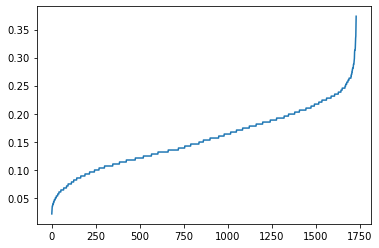

In [62]:
plt.plot((df_baseline.isna().sum(axis=1)/ df_baseline.shape[1]).sort_values().values)
(df_baseline.isna().sum(axis=1)/ df_baseline.shape[1]).sort_values().values.max()

match
NL2235    0.113879
NL586     0.124555
NL1802    0.128114
NL592     0.128114
NL4337    0.131673
            ...   
NL1284    0.377224
NL1953    0.380783
NL1590    0.395018
NL1435    0.395018
NL2532    0.405694
Length: 1603, dtype: float64

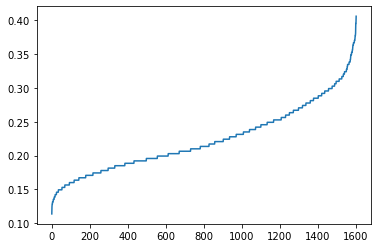

In [63]:
plt.plot((df_perspective.isna().sum(axis=1)/ df_perspective.shape[1]).sort_values().values)
(df_perspective.isna().sum(axis=1)/ df_perspective.shape[1]).sort_values()

In [71]:
df_perspective.loc[df_perspective.index=="NL2532"].isna().sum().sum()

114

In [39]:
(df_perspective.isna().sum(axis=1)/ df_perspective.shape[1]).max()

0.17793594306049823

<AxesSubplot:xlabel='P41180_CASR', ylabel='Count'>

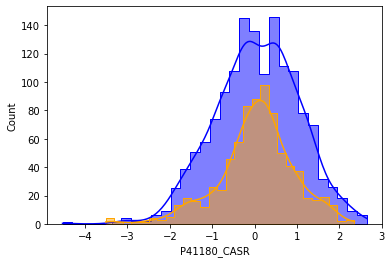

In [85]:
sns.histplot(df_baseline['P41180_CASR'].dropna(),element="step", kde=True, color="blue")
sns.histplot(df_perspective['P41180_CASR'].dropna(),element="step", kde=True, color="orange")

In [41]:
ttest_ind(df_baseline['A0A0B4J1U7_IGHV6.1'].dropna(), df_perspective['A0A0B4J1U7_IGHV6.1'].dropna())

Ttest_indResult(statistic=-1.554766186651681, pvalue=0.12032964594694825)

In [42]:
df_baseline['P0DJI8_SAA1'].isna().sum() / df_baseline['P0DJI8_SAA1'].shape[0]

0.5068846815834768

In [43]:
df_perspective.isna().sum(axis=0) / df_perspective.shape[0]

A0A075B6Q5_IGHV3.64    0.030303
A0A0B4J1U7_IGHV6.1     0.282828
A0A0B4J1V6_IGHV3.73    0.202020
A0A0C4DH35_NA          0.000000
A0A0C4DH36_NA          0.016835
                         ...   
Q9UBF2_COPG2           0.319865
Q9UJQ1_LAMP5           0.488215
Q9UPR3_SMG5            0.562290
Q9Y2K6_USP20           0.595960
Q9Y467_SALL2           0.000000
Length: 281, dtype: float64

In [44]:
df_baseline, df_perspective = distribution_deviation(df_baseline, df_perspective, threshold=0.05, method="ttest")
df_baseline.shape, df_perspective.shape

['age', 'BMI', 'DBP', 'Glu', 'HDL', 'LDL', 'SBP', 'sex', 'TG', 'wc', 'dyslipi_med', 'DM_med', 'hyper_med', 'label'] will not be included in this test
281 features will be included in this feature selection process...
57 features left


((1162, 57), (297, 57))

In [45]:
baseline_train, baseline_test = train_test_split(df_baseline,test_size=0.1, random_state=seed)

In [46]:
baseline_prot_only_train = baseline_train.merge(df_clinic_baseline[["label"]], how="inner", left_index=True, right_index=True)
baseline_prot_only_test = baseline_test.merge(df_clinic_baseline[["label"]], how="inner", left_index=True, right_index=True)
perspective_prot_only = df_perspective.merge(df_clinic_baseline[["label"]], how="inner", left_index=True, right_index=True)
baseline_prot_only_train.shape, baseline_prot_only_test.shape, perspective_prot_only.shape

((400, 58), (48, 58), (112, 58))

In [47]:
baseline_prot_only_train.label.value_counts()

1    245
0    155
Name: label, dtype: int64

In [48]:
baseline_prot_only_train.to_csv(transformed_data / "dyslipi_label/baseline_train_protein_only_dyslipi.csv")
baseline_prot_only_test.to_csv(transformed_data / "dyslipi_label/baseline_valid_protein_only_dyslipi.csv")
perspective_prot_only.to_csv(transformed_data / "dyslipi_label/perspective_protein_only_dyslipi.csv")

In [49]:
baseline_combined_train = baseline_train.merge(df_clinic_baseline, how="inner", left_index=True, right_index=True)
baseline_combined_test = baseline_test.merge(df_clinic_baseline, how="inner", left_index=True, right_index=True)
perspective_combined = df_perspective.merge(df_clinic_baseline, how="inner", left_index=True, right_index=True)
baseline_combined_train.shape, baseline_combined_test.shape, perspective_combined.shape

((400, 72), (48, 72), (112, 72))

In [50]:
baseline_combined_train.to_csv(transformed_data / "dyslipi_label/baseline_train_combined_dyslipi.csv")
baseline_combined_test.to_csv(transformed_data / "dyslipi_label/baseline_valid_combined_dyslipi.csv")
perspective_combined.to_csv(transformed_data / "dyslipi_label/perspective_combined_dyslipi.csv")

In [51]:
baseline_combined_train

O14578_CIT  Q13129_RLF  A0A0C4DH68_IGKV2.24  Q15034_HERC3  \
NL342    -1.237191    1.484141            -0.376881           NaN   
NL3009    1.581643   -1.014801             0.824900      0.282772   
NL2856         NaN    0.248830             1.540800      0.217431   
NL942          NaN    0.224281             0.368756      0.268354   
NL765     0.964707   -1.497976            -2.081982     -1.326049   
...            ...         ...                  ...           ...   
NL3018         NaN   -0.714687            -0.974770     -0.222775   
NL254    -1.508609   -0.369966             0.251942     -0.201400   
NL2797    1.716306   -0.564003            -0.900380     -0.313895   
NL1769    0.136788    2.291982             0.983712      1.958063   
NL913     0.126894    0.285983             0.841522      1.043993   

        O95445_APOM  Q4G0P3_HYDIN  Q9NQC8_IFT46  Q7RTX0_TAS1R3  Q14997_PSME4  \
NL342     -0.256602      1.017442      1.290544       1.546295     -0.144569   
NL3009     0.328075      0.867038      0.104772      -1.019214     -0.071015   
NL2856    -0.748378     -0.695074     -1.224089      -1.482080     -0.944937   
NL942      0.730750      0.368935           NaN       0.110977      0.583445   
NL765     -0.878781     -0.497947     -0.249397      -0.730090     -1.026501   
...             ...           ...           ...            ...           ...   
NL3018    -0.843832     -0.236996     -1.645109       1.518817     -0.331378   
NL254      0.175608      0.181248      0.086468       0.220333      0.240563   
NL2797     0.139504      0.458241      0.261579       0.070394      0.579773   
NL1769     2.447280      0.643168      1.725779            NaN      2.259043   
NL913      1.023752      0.992390      0.997143       0.181430      1.126000   

        Q9NQ66_PLCB1  Q8N3D4_EHBP1L1  O60500_NPHS1  P50548_ERF  \
NL342      -0.436312             NaN      1.156144    1.513289   
NL3009     -0.035484        0.739325     -0.455449   -0.443138   
NL2856     -0.295881             NaN      0.207205    0.213304   
NL942       0.729967        0.074911      1.038642    0.743714   
NL765      -0.644970       -1.164433     -1.307211   -0.413484   
...              ...             ...           ...         ...   
NL3018     -0.867791       -0.447969     -0.357366   -0.794319   
NL254       0.348861             NaN     -0.420699         NaN   
NL2797     -0.072232             NaN      0.402982         NaN   
NL1769      1.903691        2.300881           NaN         NaN   
NL913            NaN        0.928809      1.140122    0.412506   

        A0A0C4DH69_IGKV1.9  Q9H0R1_AP5M1  Q8WZ42_TTN  Q9BXT4_TDRD1  \
NL342            -0.184715      0.030913    0.931425     -0.689213   
NL3009            0.360460     -0.228461         NaN           NaN   
NL2856            0.759545      0.222410    0.765459           NaN   
NL942                  NaN      0.998120         NaN           NaN   
NL765            -2.616001      0.032819   -1.020046     -1.672357   
...                    ...           ...         ...           ...   
NL3018                 NaN      0.415495   -0.214404           NaN   
NL254            -0.273881      0.085633   -2.744112           NaN   
NL2797                 NaN     -2.433739   -0.320585           NaN   
NL1769            2.046891      1.011806         NaN           NaN   
NL913             0.795087      0.443146    0.117194           NaN   

        Q8IVE3_PLEKHH2  Q9UJQ1_LAMP5  Q96IG2_FBXL20  Q6P3X3_TTC27  \
NL342         0.488562           NaN       0.328314           NaN   
NL3009             NaN           NaN      -0.502989     -0.483997   
NL2856       -2.795614           NaN       0.548483      0.213782   
NL942              NaN           NaN       0.590716           NaN   
NL765              NaN           NaN      -0.700612     -1.603152   
...                ...           ...            ...           ...   
NL3018             NaN           NaN      -0.350972      1.163601   
NL254              NaN          

### Metrics summary

In [ ]:
pd.read_csv(root/"results/dyslipi/metric_results_1.csv").sort_values(by="baseline_auc", ascending=False).head(10)